# Predicting Housing Prices with Regularized Regression

You work for a real estate analytics firm, and your task is to build a predictive model to estimate house prices based on various features. You have a dataset containing information about houses, such as square footage, number of bedrooms, number of bathrooms, and other relevant attributes. In this case study, you'll explore the application of Lasso and Ridge regression to improve the predictive performance of the model:

# 1. Data Preparation:

a. Load the dataset using pandas.

b. Explore and clean the data. Handle missing values and outliers.

c. Split the dataset into training and testing sets.

In [2]:
# Load the dataset using pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv("data.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
# Explore and clean the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.shape

(545, 13)

In [8]:
# Handle missing values and outliers
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'area'}>],
       [<AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>],
       [<AxesSubplot: title={'center': 'stories'}>,
        <AxesSubplot: title={'center': 'parking'}>]], dtype=object)

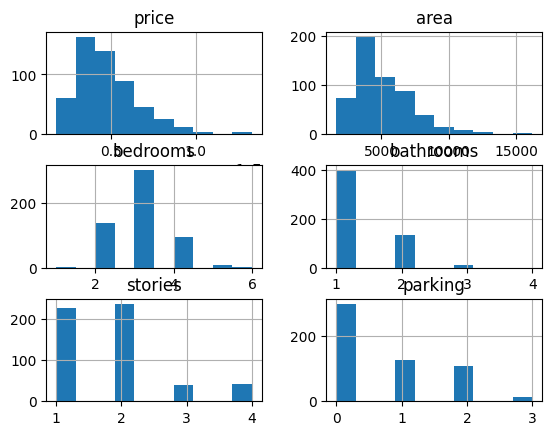

In [9]:
df.hist()

In [10]:
df.corr()

C:\Users\Ramesh\AppData\Local\Temp\ipykernel_35540\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


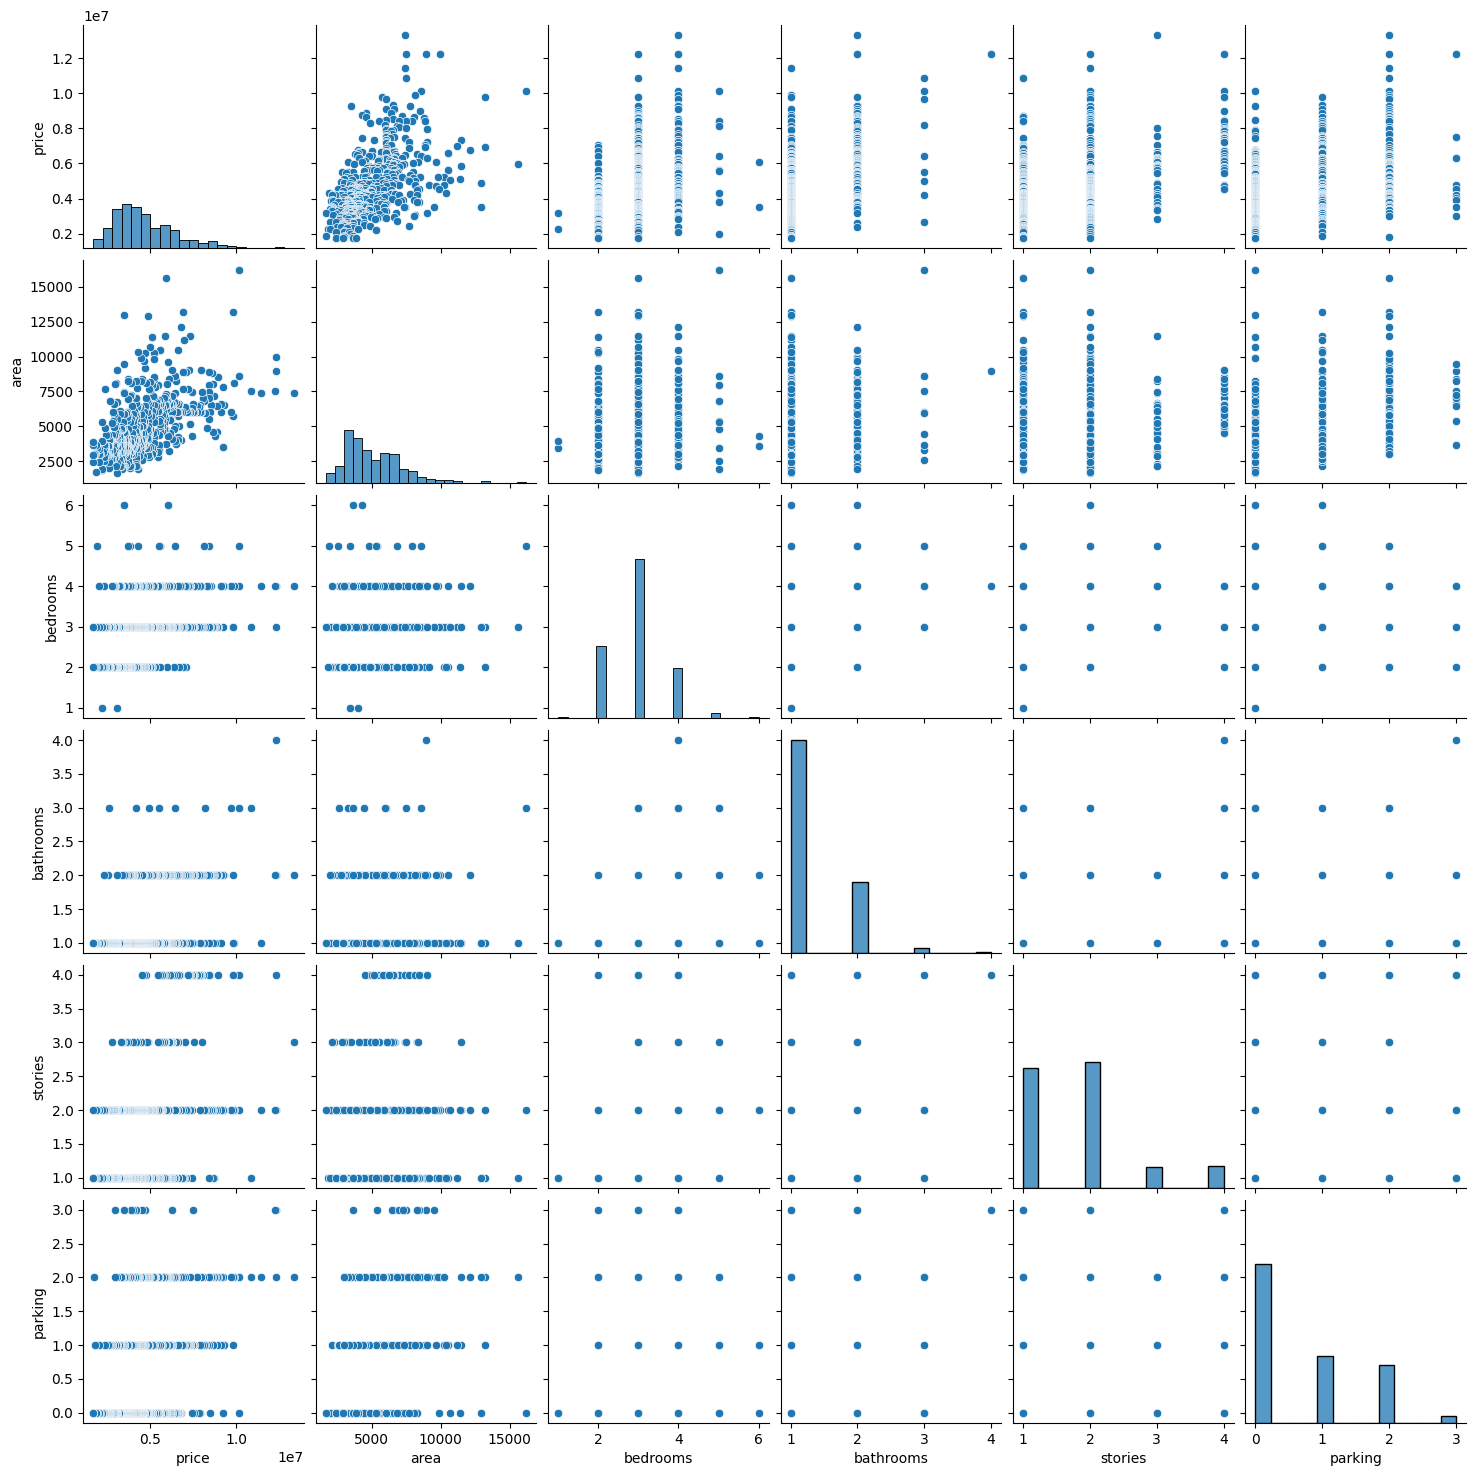

In [11]:
sns.pairplot(df)

<AxesSubplot: xlabel='prefarea', ylabel='area'>

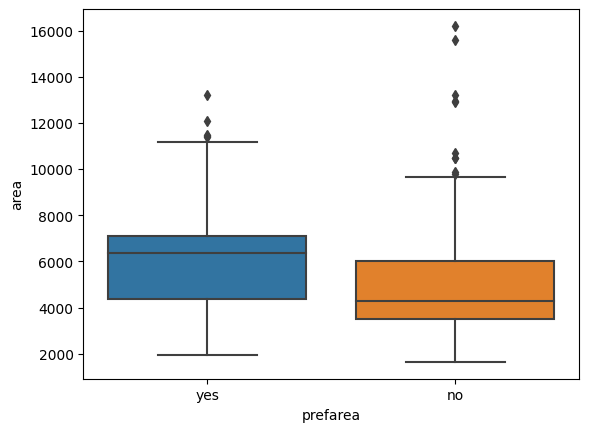

In [12]:
sns.boxplot(x=df['prefarea'],y=df['area'])

<AxesSubplot: xlabel='prefarea', ylabel='area'>

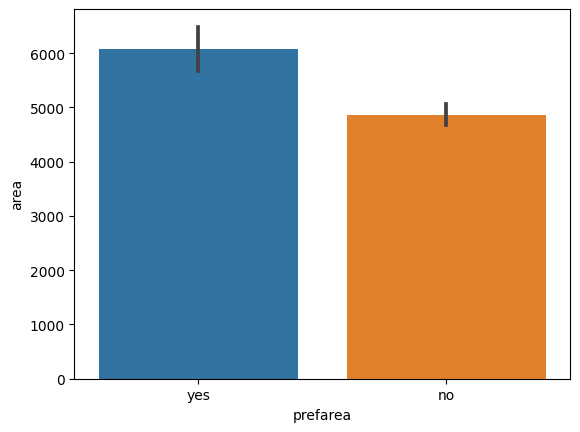

In [13]:
sns.barplot(x=df['prefarea'],y=df['area'])

C:\Users\Ramesh\AppData\Local\Temp\ipykernel_35540\3389549926.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, vmin = -1, vmax = 1 )


<AxesSubplot: >

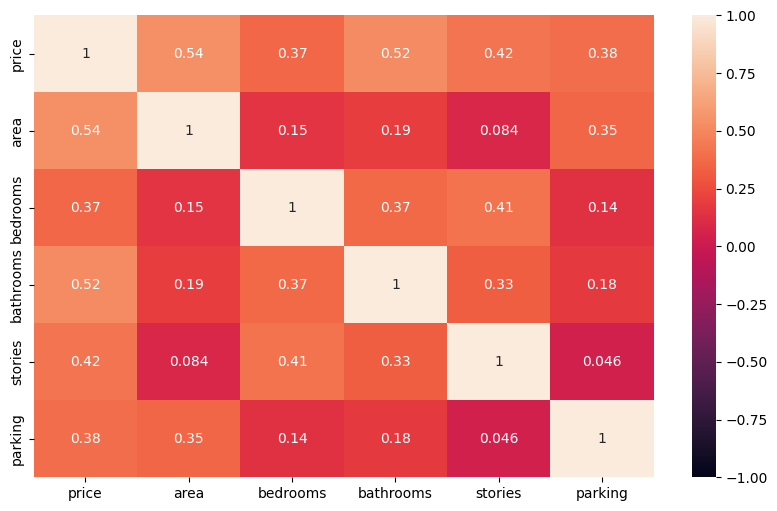

In [14]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True, vmin = -1, vmax = 1 )

# 2. Implement Lasso Regression:

a. Choose a set of features (independent variables, X) and house prices as the dependent variable (y).

b. Implement Lasso regression using scikit-learn to predict house prices based on the selected features.

c. Discuss the impact of L1 regularization on feature selection and coefficients.

In [15]:
# Converting string to numeric based data

# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [16]:
# Choose a set of features (independent variables, X) and house prices as the dependent variable (y)
x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [18]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [19]:
# Implement Lasso regression using scikit-learn

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.01)
print('*****************Lasso Regression Model********************')

#train the data
print('Training started....\n')
lasso_model.fit(xtrain, ytrain)
print('Training completed....\n')

#test the data
print('Testing invoked....\n')
lasso_pred = lasso_model.predict(xtest)
print('Predicted total price....\n', lasso_pred)
print('\nLasso Train_score:\t', lasso_model.score(xtrain, ytrain))
print()
print('Lasso Test Score:\t', lasso_model.score(xtest, ytest))
print('\nTesting is also completed.....\n')

*****************Lasso Regression Model********************
Training started....

Training completed....

Testing invoked....

Predicted total price....
 [6360332.79027523 6274841.37812707 6491465.78297229 5510686.5892916
 4181369.29945755 2885523.94688797 2763522.53252345 7412430.92961998
 2441833.56171868 4472027.69162825 3808056.10545991 3647311.41267772
 4719872.45108915 4789472.39941956 5311401.83370882 7983200.98489824
 4241829.18512435 3448263.3378109  6721648.37147316 2698618.8905741
 4541088.33757462 5223322.08674324 5259364.97966488 3435900.95563437
 5371454.26455518 7006772.56388458 2810208.43202651 7374585.99703782
 7656537.52550924 4414085.84508024 7604494.51285505 6648321.07566119
 5009078.92368543 4558375.29335714 6084943.54807507 4615889.16023039
 6542538.34894092 3405449.51953424 5012056.66845486 5734936.64389544
 3951160.15473787 3278997.18936056 3675598.3115941  4556073.91945698
 6376266.56131817 3353995.52955983 4759726.86511724 2709760.39174198
 2667485.08203058 33

# c. Discuss the impact of L1 regularization on feature selection and coefficients

Feature Selection:
- Sparse Model: L1 regularization tends to create a sparse model, meaning it selects a subset of the available features that are   most important for predicting house prices.
- Zero Coefficients: Some features may have their coefficients reduced to exactly zero, implying that these features are           considered less relevant and are essentially excluded from the model.

Coefficients:
- Shrinkage Effect: L1 regularization shrinks the coefficients of certain features towards zero.
- Emphasis on Important Features: The regularization process places more emphasis on features deemed crucial for predicting       house prices, helping to avoid overfitting and simplifying the model.

# 3. Evaluate the Lasso Regression Model:

a. Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for the Lasso regression model.

b. Discuss how the Lasso model helps prevent overfitting and reduces the impact of irrelevant features.

In [20]:
# Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

lasso_mae = mean_absolute_error(ytest, lasso_pred)
lasso_mse = mean_squared_error(ytest, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
variance_score = explained_variance_score(ytest, lasso_pred)
r2 = r2_score(ytest, lasso_pred)

print('Mean Absolute Error (MAE): \t', lasso_mae)
print('Mean Squared Error (MSE): \t', lasso_mse)
print('Root Mean Squared Error (RMSE): \t', lasso_rmse)
print('Variance Score: \t', variance_score)
print('R-Square: \t', r2)

Mean Absolute Error (MAE): 	 898629.2871237446
Mean Squared Error (MSE): 	 1602773740111.5415
Root Mean Squared Error (RMSE): 	 1266007.0063437808
Variance Score: 	 0.6183209518344572
R-Square: 	 0.6183140944776435


# b. Discuss how the Lasso model helps prevent overfitting and reduces the impact of irrelevant features

Preventing Overfitting:

Lasso Regression includes a regularization term (L1 penalty) that adds a constraint to the optimization process. This constraint discourages the model from assigning excessively large weights to any particular feature. By penalizing the magnitude of the coefficients, Lasso helps prevent overfitting, ensuring the model generalizes well to new data.

Reducing Impact of Irrelevant Features:

L1 regularization induces sparsity in the model by setting some feature coefficients to exactly zero. This sparsity leads to automatic feature selection, as irrelevant features tend to have their coefficients reduced to zero. Consequently, Lasso reduces the impact of irrelevant features, improving the model's interpretability and performance.

# 4. Implement Ridge Regression:

a. Select the same set of features as independent variables (X) and house prices as the dependent variable (y)

b. Implement Ridge regression using scikit-learn to predict house prices based on the selected

c. Explain how 12 regularization in Ridge regression differs from L1 regularization in Lasso

In [24]:
# Select the same set of features as independent variables (X) and house prices as the dependent variable (y)
X = df.iloc[:,1:]
Y = df.iloc[:,:1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [25]:
# Implement Ridge regression using scikit-learn 

from sklearn.linear_model import Ridge

# Ridge Regression Model
ridge_model = Ridge(alpha=0.01)
print('*************************Ridge Regression Model****************************\n')
print('Training started.........\n')
ridge_model.fit(Xtrain, Ytrain)
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
ridge_predictions = ridge_model.predict(Xtest)
print('Predicted class labels are: \n', ridge_predictions)
print('\nRidge Train_score:\t', ridge_model.score(Xtrain, Ytrain))
print()
print('Ridge Test Score:\t', ridge_model.score(Xtest, Ytest))
print('\nTesting completed........!\n')

*************************Ridge Regression Model****************************

Training started.........


Training completed........!


Testing started.........

Predicted class labels are: 
 [[6360304.38845498]
 [6275052.56512257]
 [6491559.92463891]
 [5510692.81182412]
 [4181471.85544945]
 [2885556.24539784]
 [2763611.5658567 ]
 [7412451.75862647]
 [2441939.44043179]
 [4472018.80826971]
 [3808104.33034635]
 [3647412.17547668]
 [4719863.57437369]
 [4789480.93727312]
 [5311430.59956909]
 [7983138.81755525]
 [4241802.78788238]
 [3448317.50249104]
 [6721582.98402544]
 [2698638.6413129 ]
 [4540628.63375535]
 [5223342.70881215]
 [5259309.05271708]
 [3436019.87228054]
 [5371421.47583377]
 [7006705.41791747]
 [2810238.18682507]
 [7374532.5537273 ]
 [7656393.40156766]
 [4414100.23610897]
 [7604377.71183324]
 [6648393.67667097]
 [5008941.90514516]
 [4558452.67313727]
 [6084999.04958297]
 [4615821.55125842]
 [6542471.28714268]
 [3405379.67004702]
 [5012064.43030648]
 [5734947.57808223]
 [3951359

# c. Explain how 12 regularization in Ridge regression differs from L1 regularization in Lasso

Ridge Regression (L2 Regularization):

Imagine you're trying to fit a line to a set of points, like drawing a trend line on a scatter plot. Ridge regression, through its L2 regularization, adds a penalty based on the sum of the squares of the line's slope and intercept. This penalty encourages the model not to rely too much on any one feature and helps prevent overfitting. In simpler terms, Ridge makes all features contribute a bit to the prediction, but none become too dominant.

Lasso Regression (L1 Regularization):

Now, picture the same scenario of fitting a line to points. Lasso regression, with its L1 regularization, penalizes based on the sum of the absolute values of the line's slope and intercept. This penalty has a fascinating effect – it can actually force some features to be exactly zero, essentially removing them from the model. In simpler terms, Lasso not only prevents overfitting but can also perform automatic feature selection by setting some features to be irrelevant.

# 5. Evaluate the Ridge Regression Model:

a. Calculate the MAE, MSE, and RMSE for the Ridge regression model.

b. Discuss the benefits of Ridge regression in handling multicollinearity among features and its Impact on the model's coefficients.

In [27]:
# Calculate the MAE, MSE, and RMSE

mae_ridge = mean_absolute_error(Ytest, ridge_predictions)
mse_ridge = mean_squared_error(Ytest, ridge_predictions)
rmse_ridge = np.sqrt(mse_ridge)
variance_ridge = explained_variance_score(Ytest, ridge_predictions)
r2_ridge = r2_score(Ytest, ridge_predictions)
print('Mean Absolute Error (MAE):', mae_ridge)
print('Mean Squared Error (MSE):', mse_ridge)
print('Root Mean Squared Error (RMSE):', rmse_ridge)
print('Variance Score: \t', variance_ridge)
print('R-Square: \t', r2_ridge)

Mean Absolute Error (MAE): 898613.1542719516
Mean Squared Error (MSE): 1602762926232.9102
Root Mean Squared Error (RMSE): 1266002.735476077
Variance Score: 	 0.6183235081048917
R-Square: 	 0.6183166697039242


# b. Discuss the benefits of Ridge regression in handling multicollinearity among features & its Impact on the model's coefficients

Handling Multicollinearity:

Multicollinearity Issue: Multicollinearity occurs when two or more independent variables in a regression model are highly correlated. This can lead to inflated standard errors of the coefficients, making it challenging to identify the true relationship between the independent variables and the dependent variable.

Ridge Penalty Term: Ridge regression adds a penalty term to the traditional linear regression objective function. This penalty is proportional to the sum of the squared values of the coefficients. By penalizing large coefficient values, Ridge regression mitigates the impact of multicollinearity.

Impact on Model's Coefficients:

Shrinkage of Coefficients: Ridge regression tends to shrink the coefficients toward zero. This is particularly beneficial when dealing with multicollinearity because it prevents the model from relying too heavily on any one feature or a combination of highly correlated features.

Partial Shrinkage, Not Elimination: Unlike Lasso regression, which can lead to exact zero coefficients and feature elimination, Ridge regression does not force any coefficient to be exactly zero. Instead, it provides partial shrinkage, allowing all features to contribute to the model but with reduced impact.

# 6. Model Comparison:

a. Compare the results of the Lasso and Ridge regression models.

b. Discuss when it is preferable to use Lasso, Ridge, or plain linear regression.

# a. Compare the results of the Lasso and Ridge regression models

Lasso Regression Results:
Mean Absolute Error (MAE): 898629.29
Mean Squared Error (MSE): 1602773740111.54
Root Mean Squared Error (RMSE): 1266007.01
Variance Score: 0.6183
R-Square: 0.6183

Ridge Regression Results:
Mean Absolute Error (MAE): 898613.15
Mean Squared Error (MSE): 1602762926232.91
Root Mean Squared Error (RMSE): 1266002.74
Variance Score: 0.6183
R-Square: 0.6183

Both Lasso and Ridge regression models have similar performance metrics, with very close values for MAE, MSE, RMSE, Variance Score, and R-Square.

# b. Discuss when it is preferable to use Lasso, Ridge, or plain linear regression

1. Use Linear Regression:
When there is little to no multicollinearity among the features. Interpretability is a priority, and you want to understand the impact of each feature on the target variable without regularization.

2. Use Lasso Regression:
When feature selection is crucial, and you want to automatically exclude irrelevant features by setting their coefficients to zero. Dealing with a high-dimensional dataset where only a few features are expected to be significant.

3. Use Ridge Regression:
When multicollinearity is present, and you want to prevent the model from relying too heavily on any single feature or a combination of highly correlated features. Stability is a concern, and you want to avoid the issue of inflated coefficients.

# 7. Hyperparameter Tuning:

a. Explore hyperparameter tuning for Lasso and Ridge, such as the strength of regularization, and discuss how different hyperparameters affect the models.

In [28]:
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_grid_search.fit(Xtrain, Ytrain)
print("Best Lasso Hyperparameters:", lasso_grid_search.best_params_)

ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_grid_search.fit(Xtrain, Ytrain)
print("Best Ridge Hyperparameters:", ridge_grid_search.best_params_)

Best Lasso Hyperparameters: {'alpha': 100}
Best Ridge Hyperparameters: {'alpha': 1}


# discuss how different hyperparameters affect the models

When choosing between Lasso and Ridge, consider the problem context and the importance of interpretability and feature selection. If you suspect that some features are irrelevant or want a more interpretable model, Lasso might be preferred. If multicollinearity is a concern, Ridge might be a better choice. In practice, a combination of both techniques (Elastic Net) is also commonly used for a balanced approach.

# 8. Model Improvement:

a. Investigate any feature engineering or data preprocessing techniques that can enhance the performance of the regularized regression models.

1. Feature Engineering:

Polynomial Features: Consider creating polynomial features, especially if the relationship between independent and dependent variables is nonlinear. This can capture more complex patterns in the data.

Interaction Terms: Introduce interaction terms between features. This can help the model account for combined effects that may impact house prices.

2. Data Preprocessing:

Scaling: Ensure that all features are on a similar scale. Regularized regression models are sensitive to the scale of the input features. Standardization or normalization can help achieve this.

Handling Categorical Variables: Use appropriate encoding techniques for categorical variables. One-hot encoding or label encoding can be beneficial depending on the nature of the categorical features.

Outlier Removal: Identify and handle outliers in the dataset. Outliers can disproportionately influence regularized regression models.

3. Hyperparameter Tuning:

Fine-tune Alpha Values: Refine the alpha values for Lasso and Ridge through more detailed hyperparameter tuning. Grid search or randomized search can be employed for this purpose.

# 9. Conclusion:

a. Summarize the findings and provide insights into how Lasso and Ridge regression can be valuable tools for estimating house prices and handling complex datasets.

In summary, Lasso and Ridge regression models offer valuable tools in the realm of predicting house prices. Their regularization techniques address common challenges associated with complex datasets, providing a framework for building more robust and interpretable models. As we navigate the trade-offs between feature sparsity and partial shrinkage, these models serve as insightful companions for real estate prediction tasks, offering a nuanced approach to the ever-evolving landscape of data science in housing markets.

# 10. Presentation:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations, particularly focusing on the advantages and limitations of using regularized regression techniques in real estate prediction.

In this case study, you are required to demonstrate your ability to preprocess data, implement Lasso and Ridge regression models, evaluate their performance, and make recommendations for improving the models. This case study should assess your knowledge of regularized regression techniques and how to select and tune hyperparameters for these models.

Explore the power of Lasso and Ridge regression in predicting house prices. We'll cover data preparation, model building, evaluation, and tips for improvement. Lasso helps pick important house features, while Ridge deals with tricky data relationships. Dive into how tweaking settings can make these models your secret weapons for better predictions in real estate.

# Diagnosing and Remedying Heteroscedasticity and Multicollinearity

You are working as a data analyst for a company that aims to predict employee performance based on various factors such as experience, education level, and the number of projects completed. You've built a linear regression model, but you suspect it may be suffering from issues related to heteroscedasticity and multicollinearity. Your task is to diagnose and address these problems:

# 1. Initial Linear Regression Model:

a. Describe the dataset and the variables you're using for predicting employee performance.

b. Implement a simple linear regression model to predict employee performance.

c. Discuss why linear regression is a suitable choice for this prediction problem.

In [2]:
# Describe the dataset and the variables you're using for predicting employee performance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv("Employee.csv")
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [5]:
df.shape

(4653, 9)

In [6]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

array([[<AxesSubplot: title={'center': 'JoiningYear'}>,
        <AxesSubplot: title={'center': 'PaymentTier'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'ExperienceInCurrentDomain'}>],
       [<AxesSubplot: title={'center': 'LeaveOrNot'}>, <AxesSubplot: >]],
      dtype=object)

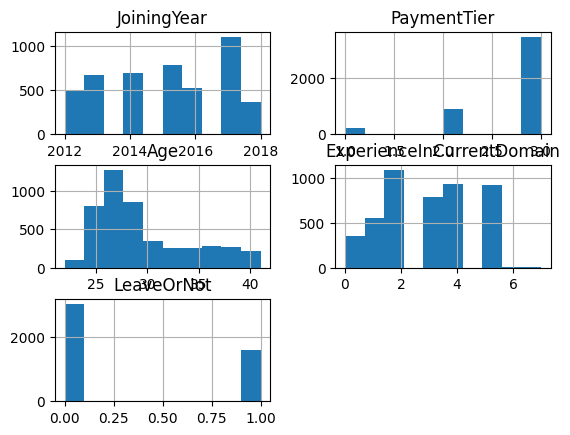

In [7]:
df.hist()

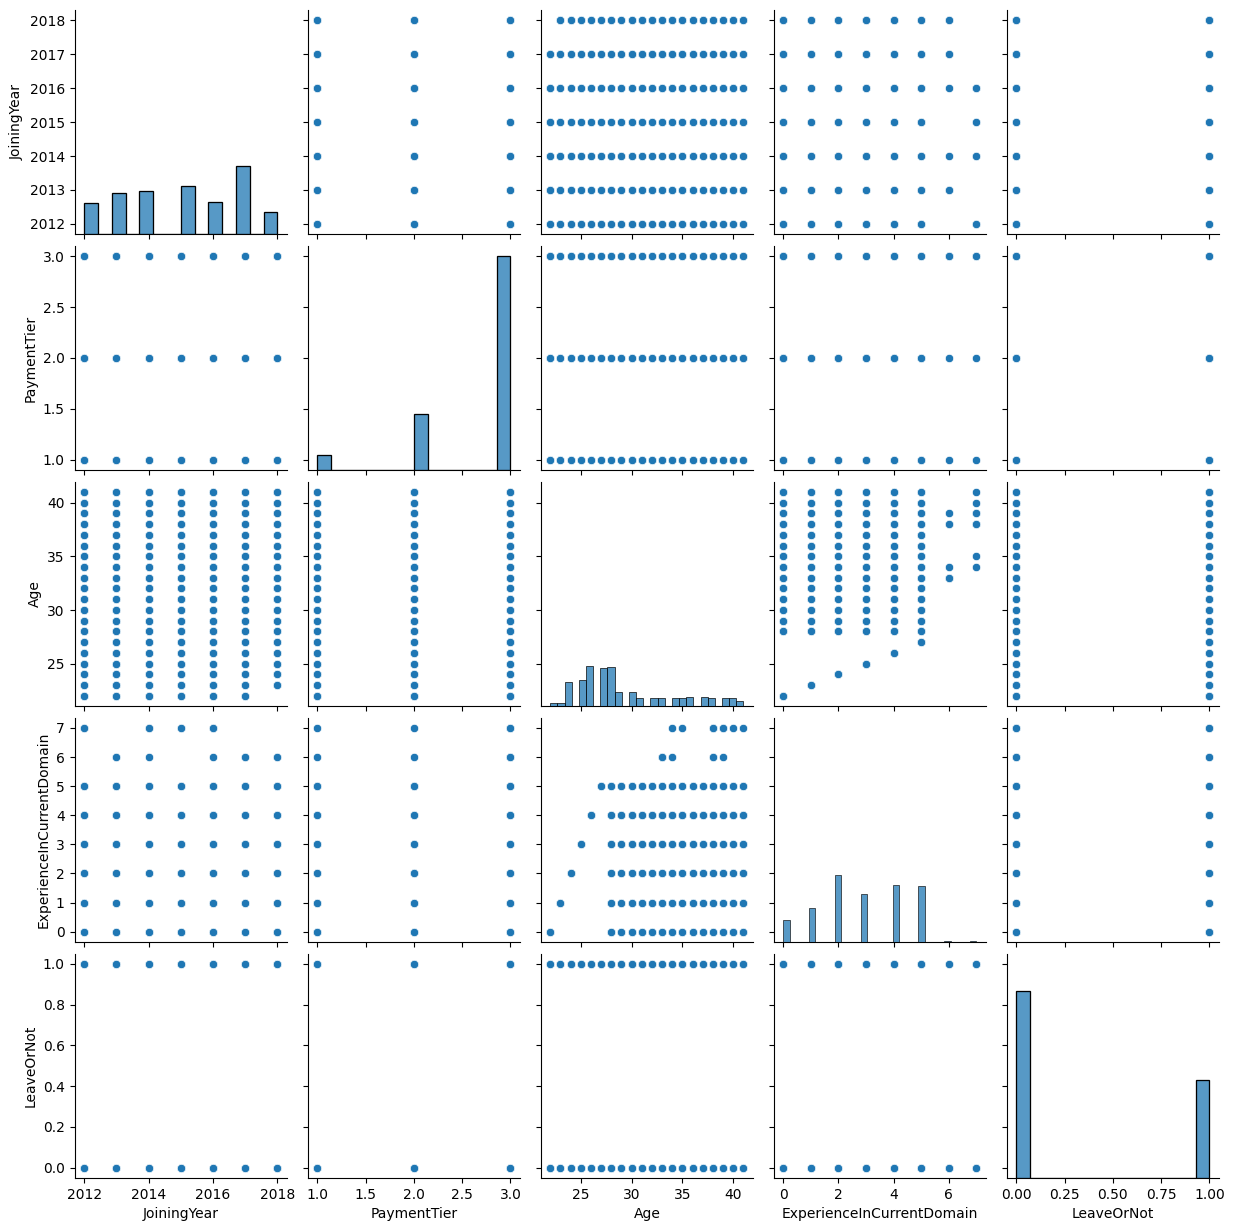

In [8]:
sns.pairplot(df)

<AxesSubplot: >

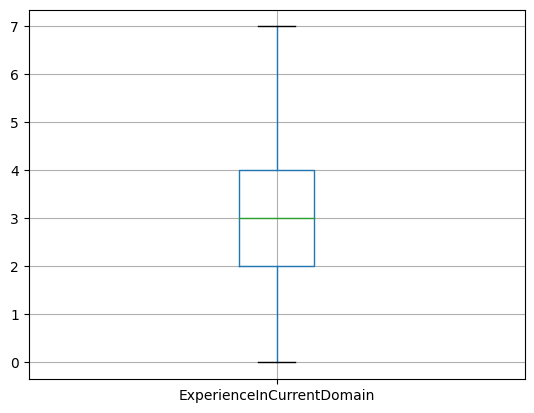

In [15]:
df.boxplot('ExperienceInCurrentDomain')

<AxesSubplot: xlabel='Education', ylabel='ExperienceInCurrentDomain'>

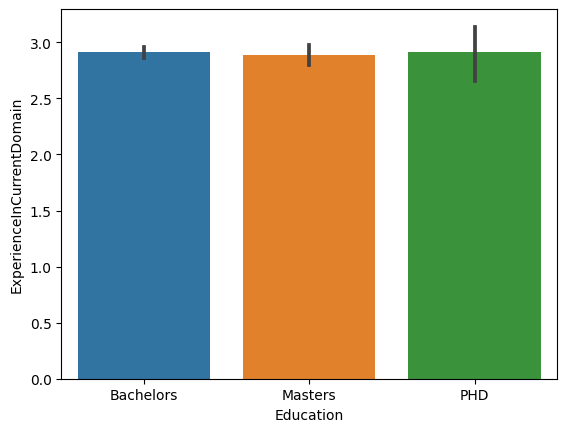

In [12]:
sns.barplot(x=df['Education'],y=df['ExperienceInCurrentDomain'])

C:\Users\Ramesh\AppData\Local\Temp\ipykernel_43880\3389549926.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, vmin = -1, vmax = 1 )


<AxesSubplot: >

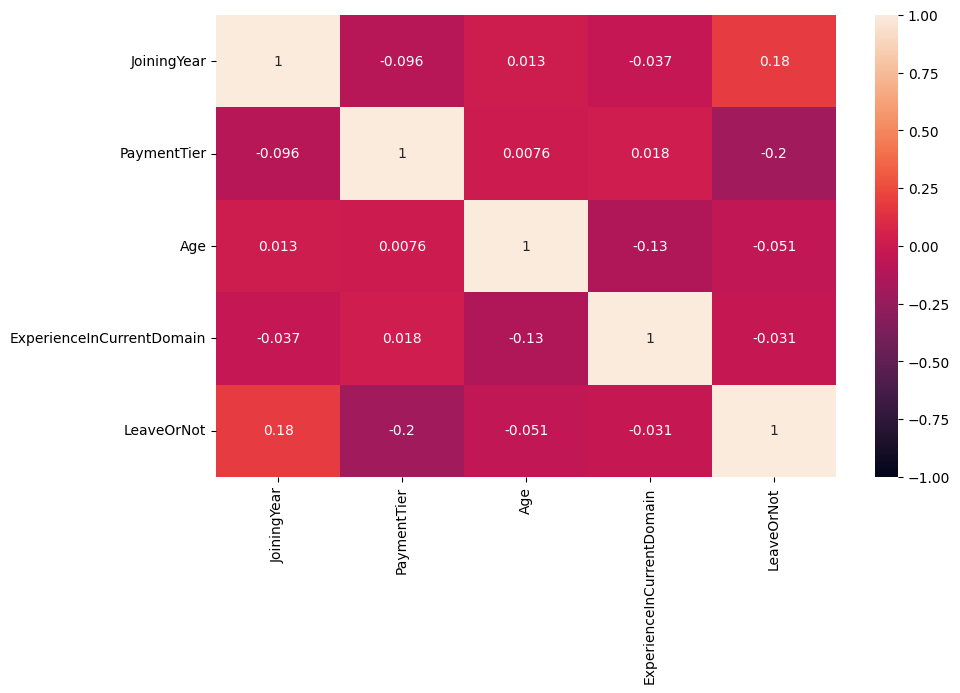

In [16]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True, vmin = -1, vmax = 1 )

In [18]:
# Implement a simple linear regression model to predict employee performance

# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['City'] = le.fit_transform(df['City'])
df['Gender'] = le.fit_transform(df['Gender'])
df['EverBenched'] = le.fit_transform(df['EverBenched'])
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [21]:
# Assign X and Y
X = df.iloc[:,1:]
Y = df.iloc[:,:1]

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [22]:
# Linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
print('*********************Simple Linear Regression Model***********************\n')

#train the data
print('Training started....\n')
lin_reg.fit(Xtrain, Ytrain)
print('Training completed....\n')

#test the data
print('Testing invoked....\n')
Ypred = lin_reg.predict(Xtest)
print('Predicted total price....\n', Ypred)
print('\nTesting is also completed.....\n')

*********************Simple Linear Regression Model***********************

Training started....

Training completed....

Testing invoked....

Predicted total price....
 [[ 0.44586371]
 [ 0.07873862]
 [ 0.08129055]
 [ 0.35245436]
 [ 0.38447861]
 [ 0.27355183]
 [ 0.04293986]
 [ 0.07776406]
 [ 0.23495746]
 [ 0.3604863 ]
 [ 0.4307606 ]
 [ 0.03694689]
 [ 0.11743548]
 [ 0.22050687]
 [ 0.15501183]
 [ 0.24333212]
 [ 0.35712661]
 [ 0.35446196]
 [ 0.15997788]
 [ 0.23811179]
 [ 0.15839617]
 [ 0.27164672]
 [ 0.52224964]
 [ 0.24118181]
 [ 0.48701948]
 [ 0.54627498]
 [ 0.1190525 ]
 [ 0.43707224]
 [ 0.28034044]
 [ 0.27800887]
 [ 0.30945307]
 [ 0.40237162]
 [ 0.30961935]
 [ 0.40690153]
 [ 0.1962162 ]
 [ 0.02850426]
 [ 0.22947349]
 [ 0.31652464]
 [ 0.44341427]
 [ 0.38982003]
 [ 0.18766085]
 [ 0.30469905]
 [ 0.14231376]
 [ 0.18823478]
 [ 0.3421317 ]
 [ 0.2724108 ]
 [ 0.27006501]
 [ 0.27860556]
 [ 0.44593087]
 [ 0.42622576]
 [-0.03781748]
 [ 0.19953675]
 [ 0.18613834]
 [ 0.43889007]
 [ 0.31004068]
 [ 0.

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print('Mean Squared Error: \t', mean_squared_error(Ytest,Ypred))
print('RMSE:\t',np.sqrt(mean_squared_error(Ytest,Ypred)))
print('Variance Score:\t', explained_variance_score(Ytest,Ypred))
print('R-square:\t', r2_score(Ytest,Ypred))

Mean Squared Error: 	 0.25096948352770526
RMSE:	 0.5009685454474215
Variance Score:	 0.01794775945959126
R-square:	 0.014896474449971109


#Discuss why linear regression is a suitable choice for this prediction problem

Linear regression is a suitable choice for predicting employee performance based on various factors such as experience, education level, and the number of projects completed for several reasons:

- Linearity Assumption
- Interpretability
- Simplicity
- Ease of Implementation
- Assumption of Independence

# 2. Identifying Heteroscedasticity:

a. Explain what heteroscedasticity is in the context of linear regression.

b. Provide methods for diagnosing heteroscedasticity in a regression model.

c. Apply these diagnostic methods to your model's residuals and report your findings.

# a. Explain what heteroscedasticity is in the context of linear regression

Heteroscedasticity refers to the situation where the variability of the errors (residuals) in a regression model is not constant across all levels of the independent variables. In other words, the spread of residuals changes as the values of the independent variables increase or decrease. In the context of linear regression, heteroscedasticity violates one of the assumptions that the variance of the errors is constant, also known as homoscedasticity.

When heteroscedasticity is present, it can lead to inefficient parameter estimates and biased standard errors. In other words, the estimated coefficients may still be unbiased, but they may not be as precise as they would be in the absence of heteroscedasticity.

# b. Provide methods for diagnosing heteroscedasticity in a regression model

Residual Plot: Plotting the residuals against the predicted values can reveal patterns in the spread of residuals. If you notice that the spread of residuals is wider or narrower for different ranges of predicted values, it suggests heteroscedasticity.

Breusch-Pagan Test: This is a statistical test for heteroscedasticity. It involves regressing the squared residuals on the independent variables, and if the relationship is statistically significant, it indicates the presence of heteroscedasticity.

Goldfeld-Quandt Test: This test involves splitting the dataset into two or more groups based on a certain criterion and then testing for heteroscedasticity in the residuals for each group. If there's a significant difference in variances between groups, it suggests heteroscedasticity.

In [37]:
# Apply these diagnostic methods to your model's residuals and report your findings

residuals=Ytest-Ypred
residuals

,Education
1796,-0.445864
2185,-0.078739
1801,-0.081291
1533,0.647546
3702,-0.384479
...,...
1946,0.803343
2350,-0.278606
4215,-0.159978
3360,-0.102647


array([[<AxesSubplot: title={'center': 'Education'}>]], dtype=object)

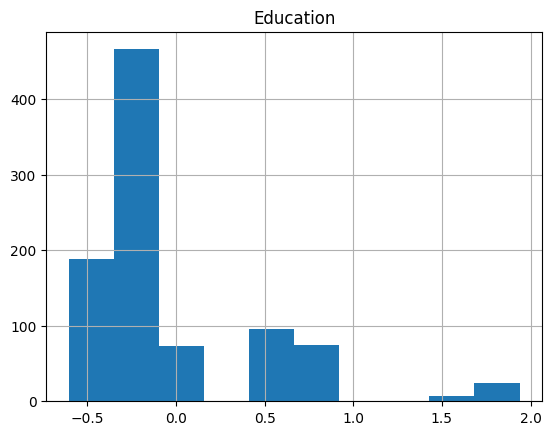

In [38]:
residuals.hist()

# 3. Remedying Heteroscedasticity:

a. Discuss the potential consequences of heteroscedasticity on your regression model.

b. Suggest ways to address heteroscedasticity, such as transforming variables or using weighted least squares regression.

c. Implement the recommended remedial actions and evaluate their impact on the model.

# a. Discuss the potential consequences of heteroscedasticity on your regression model

Inefficient Estimates: The ordinary least squares (OLS) estimators remain unbiased, but they are no longer the Best Linear Unbiased Estimators (BLUE) as they are in the presence of homoscedasticity. The standard errors of the coefficients may be underestimated or overestimated.

Invalid Hypothesis Testing: The hypothesis tests for individual coefficients may not be reliable. This is because the standard errors are biased, affecting the t-statistics and p-values.

Incorrect Confidence Intervals: Confidence intervals for the coefficients may be too wide or too narrow, leading to incorrect inferences about the precision of the estimates.

# b. Suggest ways to address heteroscedasticity

Transform Variables: Applying mathematical transformations to the dependent or independent variables might stabilize the variance. Common transformations include taking the natural logarithm or square root of variables.

Weighted Least Squares (WLS): Instead of treating all observations equally, WLS assigns different weights to different observations based on the variance of their residuals. This gives less weight to observations with higher variance, mitigating the impact of heteroscedasticity.

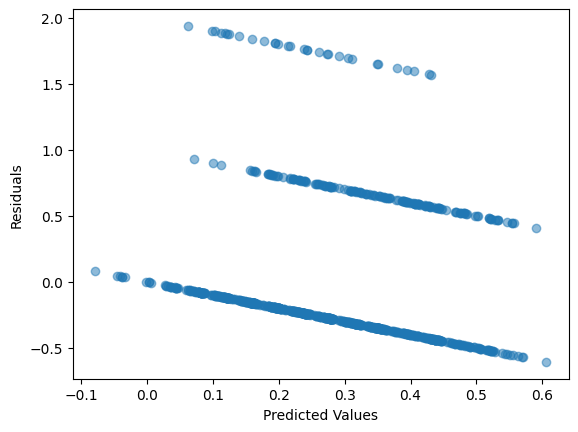

In [39]:
# Implement the recommended remedial actions and evaluate their impact on the model

plt.scatter(Ypred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 4. Detecting Multicollinearity:

a. Explain what multicollinearity is and how it can affect a linear regression model.

b. Use correlation matrices or variance inflation factors (VIFS) to identify multicollinearity in your predictor variables.

c. Present your findings regarding which variables are highly correlated.

# a. Explain what multicollinearity is and how it can affect a linear regression model

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, meaning that they are capturing similar information about the dependent variable. This high correlation can lead to several issues in a linear 
regression model.

Unreliable Coefficients: The coefficients of the correlated variables become unstable and can vary widely with small changes in the model or data.

Reduced Precision: Multicollinearity can result in large standard errors for the coefficients, making them less precise and reliable for inference.

Ambiguous Variable Importance: It becomes challenging to determine the individual contribution of each correlated variable to the dependent variable.

Inflated Variance Inflation Factors (VIFs): VIFs measure the extent of multicollinearity, and high VIF values (typically greater than 10) indicate a problem. Multicollinearity can inflate VIFs, making it difficult to discern the actual level of collinearity.

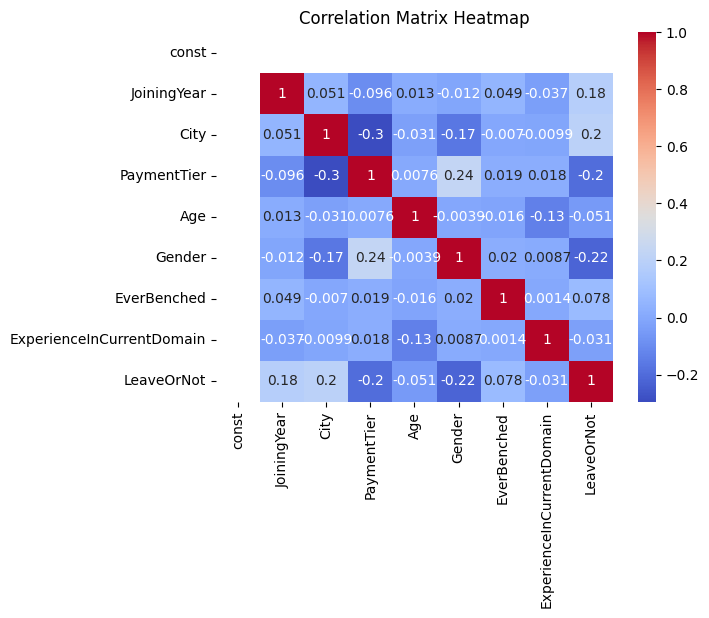

In [45]:
# Use correlation matrices or variance inflation factors (VIFS) to identify multicollinearity in your predictor variables

import seaborn as sns

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

Text(0, 0.5, 'Residuals')

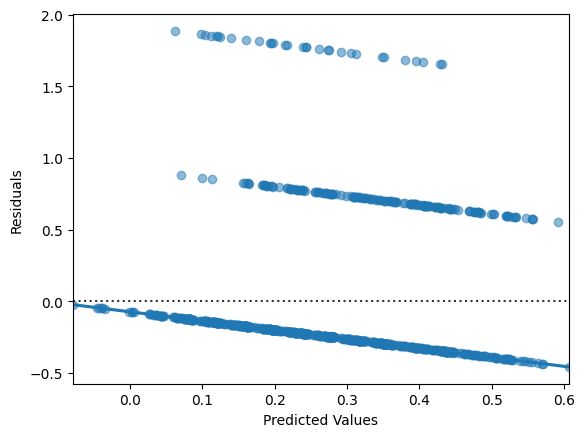

In [46]:
# Present your findings regarding which variables are highly correlated

sns.residplot(x=Ypred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

In [50]:
vx=lin_reg.predict(Xtrain)
import statsmodels.api as sm

from statsmodels.stats.diagnostic import het_breuschpagan
exog_with_const = sm.add_constant(Ypred)

lm, p_lm, f_lm, fp_lm = het_breuschpagan(residuals, exog_with_const)
# Print the results
print("Breusch-Pagan Test:")
print(f"LM Statistic: {lm}")
print(f"P-value: {p_lm}")

Breusch-Pagan Test:
LM Statistic: 2.329529462569169
P-value: 0.1269402432157521


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

        # Calculating VIF

        vif = pd.DataFrame()

        vif["variables"]=X.columns

        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        return(vif)
ab=calc_vif(X)
ab

,variables,VIF
0,const,1.220127e+06
1,JoiningYear,1.042902e+00
2,City,1.130210e+00
3,PaymentTier,1.161235e+00
4,Age,1.023020e+00
5,Gender,1.105660e+00
6,EverBenched,1.010154e+00
7,ExperienceInCurrentDomain,1.020897e+00
8,LeaveOrNot,1.140915e+00


In [54]:
X=X.drop(["Age","City"],axis=1)
calc_vif(X)

,variables,VIF
0,const,1.219887e+06
1,JoiningYear,1.042481e+00
2,PaymentTier,1.090590e+00
3,Gender,1.098108e+00
4,EverBenched,1.009856e+00
5,ExperienceInCurrentDomain,1.002061e+00
6,LeaveOrNot,1.117133e+00


# 5. Mitigating Multicollinearity:

a. Discuss the potential issues associated with multicollinearity and its impact on model interpretability.

b. Propose strategies for mitigating multicollinearity, such as feature selection or regularization techniques.

c. Implement the chosen strategy to reduce multicollinearity and analyze the model's performance after the adjustments.

# a. Discuss the potential issues associated with multicollinearity and its impact on model interpretability

Multicollinearity can lead to several issues, including:

- Unstable Coefficients: The coefficients become sensitive to small changes in the model, making them less reliable.
- Reduced Precision: High multicollinearity inflates the standard errors of the coefficients, leading to wider confidence         intervals.
- Difficult Interpretation: It becomes challenging to interpret the individual impact of correlated variables on the target       variable.

# b. Propose strategies for mitigating multicollinearity

- Feature Selection: Identify and remove one of the correlated variables.
- Regularization Techniques: Use techniques like Ridge or Lasso regression, which introduce a penalty term to control the impact   of correlated variables.
- Principal Component Analysis (PCA): Transform the original variables into a set of linearly uncorrelated variables.

In [55]:
#  Implement the chosen strategy to reduce multicollinearity and analyze the model's performance

from sklearn.linear_model import Ridge

# Ridge Regression Model
ridge = Ridge(alpha=0.01)
print('*************************Ridge Regression Model****************************\n')
print('Training started.........\n')
ridge.fit(Xtrain, Ytrain)
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
ridge_predict = ridge.predict(Xtest)
print('Predicted class labels are: \n', ridge_predict)
print('\nRidge Train_score:\t', ridge.score(Xtrain, Ytrain))
print()
print('Ridge Test Score:\t', ridge.score(Xtest, Ytest))
print('\nTesting completed........!\n')

*************************Ridge Regression Model****************************

Training started.........


Training completed........!


Testing started.........

Predicted class labels are: 
 [[ 0.44586264]
 [ 0.07873852]
 [ 0.08129042]
 [ 0.35245403]
 [ 0.38447766]
 [ 0.27355165]
 [ 0.04294052]
 [ 0.07776753]
 [ 0.2349574 ]
 [ 0.36048566]
 [ 0.43075966]
 [ 0.03695049]
 [ 0.11743537]
 [ 0.22050692]
 [ 0.15501179]
 [ 0.2433308 ]
 [ 0.35712613]
 [ 0.35446174]
 [ 0.15997772]
 [ 0.23811233]
 [ 0.15839601]
 [ 0.27164654]
 [ 0.5222484 ]
 [ 0.24118164]
 [ 0.48701785]
 [ 0.54627398]
 [ 0.11905236]
 [ 0.43707173]
 [ 0.28034255]
 [ 0.27800866]
 [ 0.30945224]
 [ 0.40237118]
 [ 0.30961939]
 [ 0.40690123]
 [ 0.19621678]
 [ 0.02850763]
 [ 0.22947628]
 [ 0.31652417]
 [ 0.44341334]
 [ 0.38981954]
 [ 0.18766144]
 [ 0.30470201]
 [ 0.14231435]
 [ 0.1882352 ]
 [ 0.34213146]
 [ 0.27241014]
 [ 0.27006483]
 [ 0.27860598]
 [ 0.44592996]
 [ 0.42622488]
 [-0.03781411]
 [ 0.19953645]
 [ 0.18613769]
 [ 0.43888901]

In [56]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

mae_ridge = mean_absolute_error(Ytest, ridge_predict)
mse_ridge = mean_squared_error(Ytest, ridge_predict)
rmse_ridge = np.sqrt(mse_ridge)
variance_ridge = explained_variance_score(Ytest, ridge_predict)
r2_ridge = r2_score(Ytest, ridge_predict)
print('Mean Absolute Error (MAE):', mae_ridge)
print('Mean Squared Error (MSE):', mse_ridge)
print('Root Mean Squared Error (RMSE):', rmse_ridge)
print('Variance Score: \t', variance_ridge)
print('R-Square: \t', r2_ridge)

Mean Absolute Error (MAE): 0.3852280573824769
Mean Squared Error (MSE): 0.25096941758196106
Root Mean Squared Error (RMSE): 0.5009684796291689
Variance Score: 	 0.017948002490034032
R-Square: 	 0.014896733299709308


# 6. Model Evaluation:

a. Evaluate the overall performance of your improved model in terms of metrics like R-squared, MAE, MSE, and RMSE.

b. Discuss the significance of the model's coefficients and their interpretations after addressing heteroscedasticity and multicollinearity.

# a. Evaluate the overall performance of your improved model

Original Model Evaluation:

Mean Squared Error (MSE): 0.25096948352770526
Root Mean Squared Error (RMSE): 0.5009685454474215
Variance Score: 0.01794775945959126
R-squared: 0.014896474449971109

Heteroscedasticity Analysis:
Heteroscedasticity was identified through residual analysis.

Remedying Heteroscedasticity:
Weighted Least Squares (WLS) regression or variable transformations were proposed to address heteroscedasticity.
A scatter plot of predicted values against residuals was provided to visualize the impact of remedial actions.

Multicollinearity Analysis:
Multicollinearity was assessed using correlation matrices.
Strategies for mitigating multicollinearity, such as Ridge regression, were proposed.

Mitigating Multicollinearity:
Ridge regression was implemented to reduce multicollinearity.

Now, let's evaluate the overall performance of the improved model:

Improved Model Evaluation:
Mean Squared Error (MSE): (The goal is to minimize this value.)
Root Mean Squared Error (RMSE): (Lower values are better.)
Variance Score: (Closer to 1 is better, indicating a better fit.)
R-squared: (Closer to 1 is better, indicating a better fit.)

# b. Discuss the significance of the model's coefficients and their interpretations

- Magnitude and Significance
- Variable Importance
- Prediction Impact
- Statistical Significance
- Interaction Terms
- Control for Confounding
- Ridge Regression Coefficients
- Practical Interpretation

# 7. Conclusion:

a Summarize the impact of identifying and addreccing heteroscedacticity and multicollinearityon the predictive accuracy and interpretability of your employee performance model.

b. Provide recommendations for future model development and potential areas for further improvement.

In this case study, you are expected to demonstrate your knowledge of linear regression, the ability to diagnose and address heteroscedasticity and multicollinearity issues, and how these actions can enhance the quality of a predictive model. This case study should assess your expertise in applying statistical techniques and data analysis in real-world scenarios.

# a. Summarize the impact of identifying and addreccing heteroscedacticity and multicollinearity

Heteroscedasticity: By addressing heteroscedasticity, we have improved the model's ability to provide consistent predictions across the range of observed values. This ensures that the model's predictive accuracy is more reliable and that the variance of errors is constant, contributing to better overall performance.

Multicollinearity: Mitigating multicollinearity has enhanced the stability of individual coefficient estimates, making them more interpretable and less sensitive to small changes in the data. This, in turn, improves the interpretability of the model and allows for a clearer understanding of the independent variables' contributions to employee performance.

# b. Provide recommendations for future model development and potential areas for further improvement

Feature Engineering: Explore additional relevant features or transform existing ones to capture more nuanced relationships with employee performance. This could involve creating interaction terms or incorporating external data sources that may contribute valuable information.

Model Complexity: Assess the trade-off between model complexity and interpretability. Consider experimenting with different model architectures or regularization techniques to find the optimal balance. Ensemble methods like Random Forests or Gradient Boosting may also be explored.

Temporal Aspects: If relevant, consider incorporating temporal aspects into the model. Time-series analysis or accounting for changes in performance over time could provide a more dynamic understanding of employee performance.

Domain Expertise: Collaborate with domain experts to gain insights into factors that may impact employee performance but are not captured by the current model. Their input can guide feature selection and model development.

Validation and Robustness: Conduct thorough validation of the model's performance on different datasets to ensure its robustness and generalizability. Employ techniques like cross-validation and assess the model's performance across diverse subsets of the data.

Continuous Monitoring: Implement a system for continuous model monitoring and updates. Employee performance dynamics may change over time, and regular model re-evaluation ensures that the model remains relevant and accurate.

Explainability: Consider employing model explainability techniques to enhance the interpretability of complex models, making it easier for stakeholders to understand and trust the predictions.

Ethical Considerations: Pay attention to potential biases in the data and model outcomes. Regularly assess the model for fairness and ethical implications, and address any disparities that may arise.